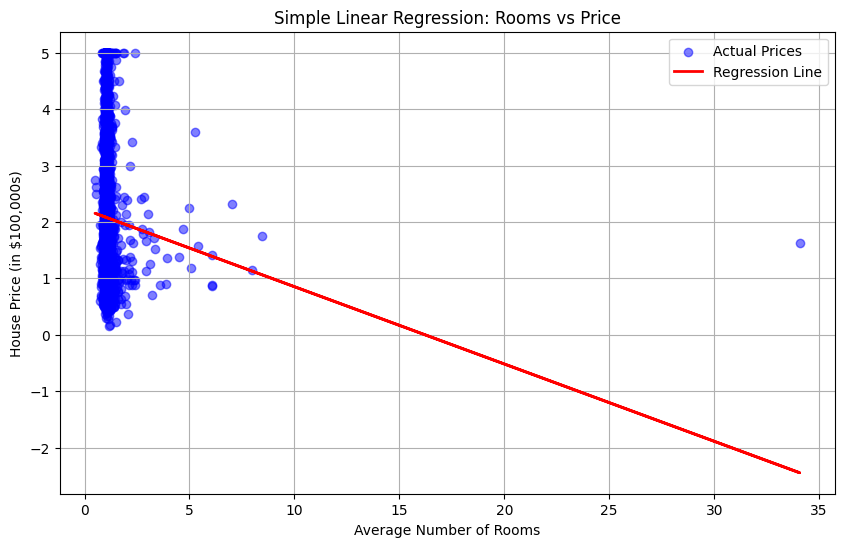

In [8]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


housing = fetch_california_housing()
X = housing.data
y = housing.target


X_rooms = X[:, [3]]

X_train, X_test, y_train, y_test = train_test_split(X_rooms, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices', alpha=0.5)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Average Number of Rooms')
plt.ylabel('House Price (in $100,000s)')
plt.title('Simple Linear Regression: Rooms vs Price')
plt.legend()
plt.grid(True)
plt.show()


In [12]:

import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

housing = fetch_california_housing()
X = housing.data  # All 8 numeric features
y = housing.target  # Median house value in $100,000s
feature_names = housing.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print("Model Evaluation Metrics:")
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

print("\nModel Coefficients:")
for name, coef in zip(feature_names, model.coef_):
    print(f"{name}: {coef:.4f}")


Model Evaluation Metrics:
R-squared: 0.5758
Mean Squared Error (MSE): 0.5559
Root Mean Squared Error (RMSE): 0.7456

Model Coefficients:
MedInc: 0.4487
HouseAge: 0.0097
AveRooms: -0.1233
AveBedrms: 0.7831
Population: -0.0000
AveOccup: -0.0035
Latitude: -0.4198
Longitude: -0.4337


In [15]:

import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler


housing = fetch_california_housing()
X = housing.data
y = housing.target
feature_names = housing.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_raw = LinearRegression()
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)

r2_raw = r2_score(y_test, y_pred_raw)
mse_raw = mean_squared_error(y_test, y_pred_raw)
rmse_raw = np.sqrt(mse_raw)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)


r2_scaled = r2_score(y_test, y_pred_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)


print("Model Performance WITHOUT Feature Scaling:")
print(f"R-squared: {r2_raw:.4f}")
print(f"MSE: {mse_raw:.4f}")
print(f"RMSE: {rmse_raw:.4f}")

print("\nModel Performance WITH Feature Scaling (StandardScaler):")
print(f"R-squared: {r2_scaled:.4f}")
print(f"MSE: {mse_scaled:.4f}")
print(f"RMSE: {rmse_scaled:.4f}")


Model Performance WITHOUT Feature Scaling:
R-squared: 0.5758
MSE: 0.5559
RMSE: 0.7456

Model Performance WITH Feature Scaling (StandardScaler):
R-squared: 0.5758
MSE: 0.5559
RMSE: 0.7456


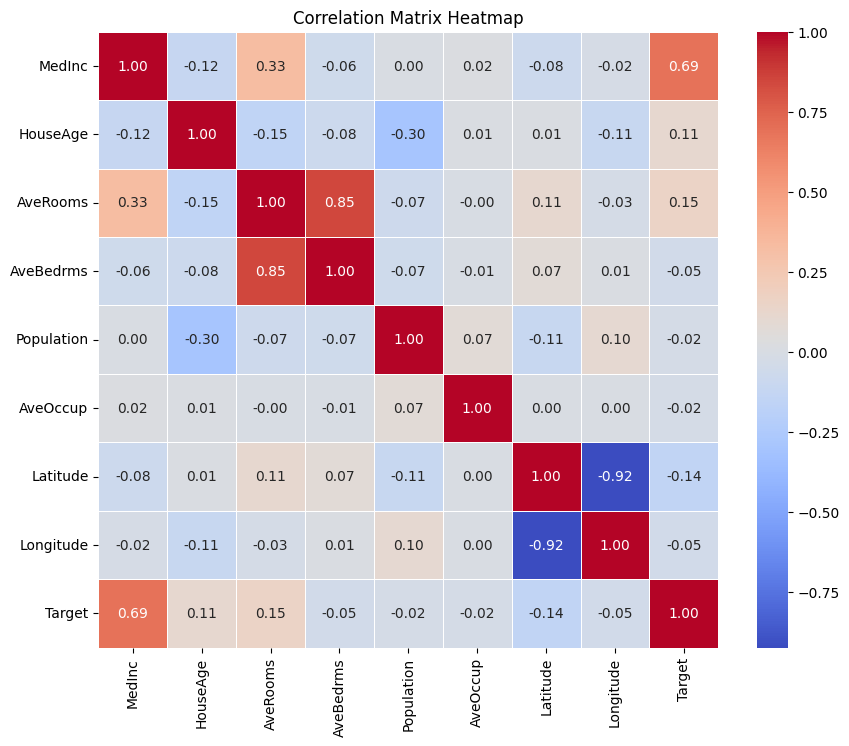

In [14]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing


data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='Target')

df = pd.concat([X, y], axis=1)

corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [16]:
target_corr = corr_matrix['Target'].drop('Target').sort_values(key=abs, ascending=False)

print("Features most correlated with the Target (house price):\n")
print(target_corr)

Features most correlated with the Target (house price):

MedInc        0.688075
AveRooms      0.151948
Latitude     -0.144160
HouseAge      0.105623
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
Name: Target, dtype: float64


Multicollinearity occurs when two or more independent variables are highly correlated with each other.
Unstable Coefficients: Model can’t distinguish the effect of one feature from another.

Reduced Interpretability: You don’t know which feature is actually influencing the prediction.

Statistical Tests Become Unreliable: P-values and confidence intervals are affected.

Accuracy: 0.9561


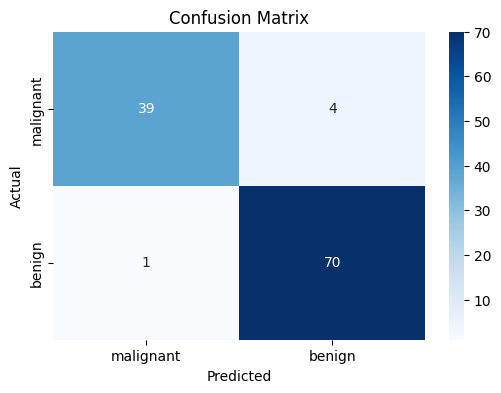


Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



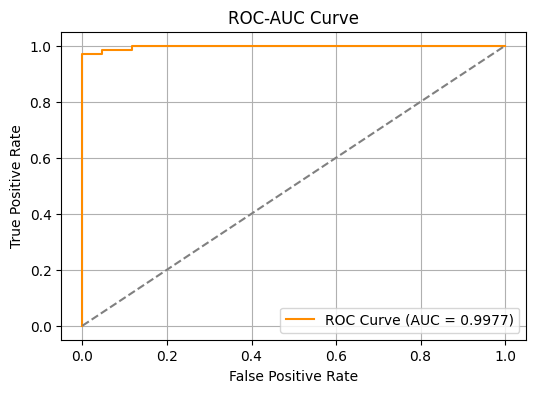

In [17]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, roc_auc_score
)
import seaborn as sns

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='Target')  # 0 = malignant, 1 = benign

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]




accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



Threshold = 0.3
Confusion Matrix:
[[39  4]
 [ 1 70]]
F1 Score: 0.9655

Threshold = 0.5
Confusion Matrix:
[[39  4]
 [ 1 70]]
F1 Score: 0.9655

Threshold = 0.7
Confusion Matrix:
[[41  2]
 [ 1 70]]
F1 Score: 0.979


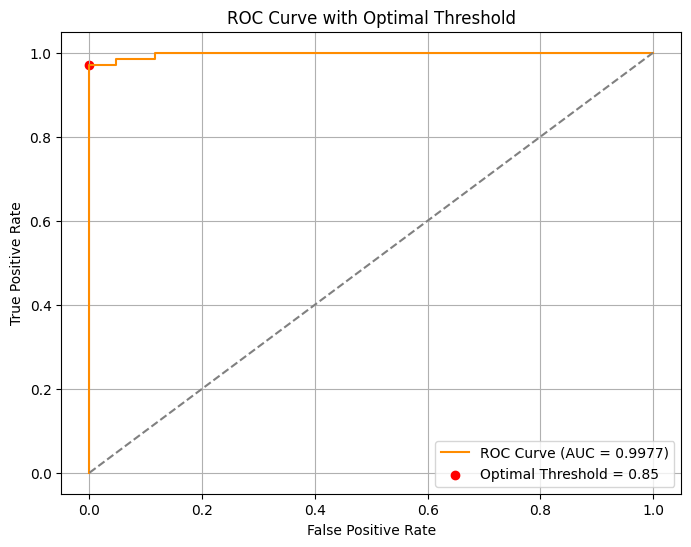


Optimal Threshold (Youden's J): 0.85


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report,
    f1_score, roc_curve, roc_auc_score
)
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="Target")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_probs = model.predict_proba(X_test)[:, 1]

def evaluate_threshold(threshold):
    y_pred_thresh = (y_probs >= threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    print(f"\nThreshold = {threshold}")
    print("Confusion Matrix:")
    print(cm)
    print("F1 Score:", round(f1, 4))

for t in [0.3, 0.5, 0.7]:
    evaluate_threshold(t)

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

youden_index = tpr - fpr
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with Optimal Threshold")
plt.legend()
plt.grid(True)
plt.show()

print(f"\nOptimal Threshold (Youden's J): {optimal_threshold:.2f}")


In [20]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="Target")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


1 - Linear regression assumes a linear relationship between the independent and dependent variables, homoscedasticity (constant variance of errors), independence of errors, normal distribution of residuals, and no or minimal multicollinearity among predictors.

2-Logistic regression is used when the target variable is categorical (usually binary), whereas linear regression is used for continuous outcomes. Logistic regression models the probability of class membership rather than predicting a numeric value.

3-Each coefficient represents the change in the log-odds of the positive class for a one-unit increase in the corresponding feature, holding all other features constant. Exponentiating a coefficient gives the odds ratio.

4-The sigmoid function maps a real-valued number to a value between 0 and 1 and is used for binary classification. The softmax function generalizes sigmoid for multiclass classification by converting raw scores into a probability distribution across multiple classes.

5-R-squared measures the proportion of variance explained in linear regression but is not meaningful for logistic regression, which predicts probabilities. Instead, metrics like accuracy, precision, recall, F1-score, and AUC-ROC are used to evaluate classification performance.